In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np

In [18]:
inlier_path = os.path.join('fingerprint\Real')
outlier_path = os.path.join('fingerprint\Distorted')
inlier = [os.path.join(inlier_path, fname) for fname in os.listdir(inlier_path)]
outlier = [os.path.join(outlier_path, fname) for fname in os.listdir(outlier_path)]
num_of_file = len(os.listdir(inlier_path))
num_of_file

128

In [19]:
samples = np.array(inlier + outlier[:32])
labels = np.array([0 for i in range(num_of_file)] + [1 for i in range(len(outlier[:32]))])

In [20]:
indices = np.arange(samples.shape[0])
#np.random.shuffle(indices)

samples = samples[indices]
labels = labels[indices]

X_train_path = samples
y_train = labels
# X_test_path = samples[100:]
# y_test = labels[100:]

In [21]:
len(labels)

160

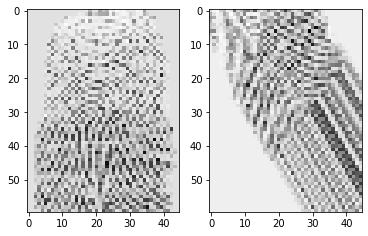

In [22]:
def pipeline(img_path):
    img = image.load_img(img_path,target_size = (60,45),color_mode = "grayscale")
    img = image.img_to_array(img)
    return img.flatten()
#plt.figure
fig,ax = plt.subplots(1,2)
ax[0].imshow(image.array_to_img(pipeline(inlier[0]).reshape(60,45,1)),cmap="gray")
ax[1].imshow(image.array_to_img(pipeline(outlier[0]).reshape(60,45,1)),cmap="gray")

In [23]:
X_train = []
# X_test = []
for path in X_train_path:
    img = pipeline(path)
    X_train.append(img)
# for path in X_test_path:
#     img = image.load_img(path,target_size = (60,45), color_mode = "grayscale")
#     img = image.img_to_array(img)
#     img = img.flatten()
#     X_test.append(img)

In [24]:
X_train = np.vstack(X_train)
# X_test = np.vstack(X_test)
y_train = np.vstack(y_train)
#y_test = np.vstack(y_test)

In [25]:
X_train.shape[0]

160

In [26]:
from pyod.models.copod import COPOD
clf = COPOD(contamination = 0.2)

In [27]:
clf.fit(X_train)

COPOD(contamination=0.2, n_jobs=1)

In [28]:
from joblib import dump, load

# save the model
dump(clf, 'model1.joblib')

['model1.joblib']

In [29]:
from joblib import dump, load

# save the model
clf = load('model1.joblib')

In [30]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

clf_name = "COPOD"

y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
# y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
# print("\nOn Test Data:")
# evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
# visualize("COPOD", X_train, Y_train, X_test, Y_test, y_train_pred,
#           y_test_pred, show_figure=True, save_figure=False)


On Training Data:
COPOD ROC:0.8606, precision @ rank n:0.5625


In [31]:
print(labels)
print(clf.labels_)
print(sum(clf.labels_[:128]))
print(32-sum(clf.labels_[128:]))
(32-14)/32


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 0 1 1 0 0 0]
14
14


0.5625

In [32]:
outlier_path = os.path.join('pattern')
outlier = []
for d in os.listdir(outlier_path):
    nested_d = os.path.join(outlier_path, d)
    pattern = [os.path.join(nested_d, fname) for fname in os.listdir(nested_d)]
    outlier += pattern
more_test = outlier
result = []
X = []
for i in more_test:
    x = pipeline(i)
    X.append(x)
X = np.vstack(X)
y = clf.predict(X)
print('precision is',sum(y)/len(y))


precision is 0.07


In [19]:
sum(y)/len(y)

0.6875

In [33]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,